## Advanced Finance Project-2
<br>
<br>


#1


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

## Question - 1

In [ ]:
#Question - 1
#Reading the data from CSV file
df = pd.read_excel(r'btc_nov20change0F.xlsx', parse_dates=['Date'])

In [ ]:
df.head()

,Date,ret,Mkt-RF,Unnamed: 3,drxon,log_vol,volume,spx,nasdaq,vix,...,hashrate,mean hashrate,blox,diffic,mean diffic,inflows,outflows,transx,transf usd,transf
0,2017-02-01,0.023781,0,NaN,1,0.0,0.648393,0.002110,0.002123,-0.022376,...,0.019048,0.000864,0.019048,0.0,0.000000e+00,0.423231,0.545170,0.486776,0.048134,0.334910
1,2017-03-01,0.021580,0.83,NaN,1,0.0,0.047879,0.002106,0.002119,-0.022888,...,0.030962,0.006995,0.030962,0.0,0.000000e+00,0.346054,0.270039,0.066450,0.262790,0.050699
2,2017-04-01,0.099699,0.79,NaN,1,0.0,0.187204,0.005706,0.008788,-0.081016,...,-0.069429,0.003615,-0.069429,0.0,3.108620e-15,0.482525,0.429424,0.052829,0.196326,-0.045447
3,2017-05-01,-0.132271,-0.21,NaN,-1,0.0,0.599507,-0.000771,0.001995,-0.015306,...,-0.088795,0.001050,-0.088795,0.0,0.000000e+00,-0.009906,0.300932,-0.115382,0.296938,-0.152061
4,2017-06-01,-0.113482,0.29,NaN,-1,0.0,0.014978,0.003511,0.006017,-0.030450,...,0.139762,0.000898,0.139762,0.0,-3.110000e-15,-0.490144,-0.318161,0.168911,-0.523001,0.174644


In [ ]:
df['Date'].head()

0   2017-02-01
1   2017-03-01
2   2017-04-01
3   2017-05-01
4   2017-06-01
Name: Date, dtype: datetime64[ns]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m')
df = df.loc[(df['Date'] >= '20170101') & (df['Date'] <= '20231231')]

ret = df['ret']
ret

0       0.023781
1       0.021580
2       0.099699
3      -0.132271
4      -0.113482
          ...   
2164    0.007580
2165   -0.014757
2166    0.024452
2167   -0.007648
2168   -0.000528
Name: ret, Length: 2129, dtype: float64

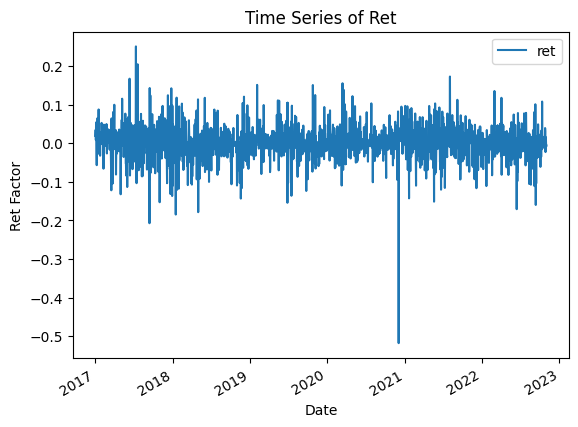

In [ ]:
#Part - 1
#Plotting the time series of value-weighted monthly factor returns for the Ret factor
df.plot(x = 'Date', y = 'ret')
plt.xlabel('Date')
plt.ylabel('Ret Factor')
plt.title('Time Series of Ret')
plt.show()

In [ ]:
#Calculating the annualized mean and standard deviation of this return series
annualized_mean = df['ret'].mean() * 12
annualized_std_dev = df['ret'].std() * math.sqrt(12)
print("Annualized Mean of this return series is: "+str(annualized_mean))
print("Annualized Standard Deviation of this return series is: "+str(annualized_std_dev))

Annualized Mean of this return series is: 0.017394367440112732
Annualized Standard Deviation of this return series is: 0.1449297005794945


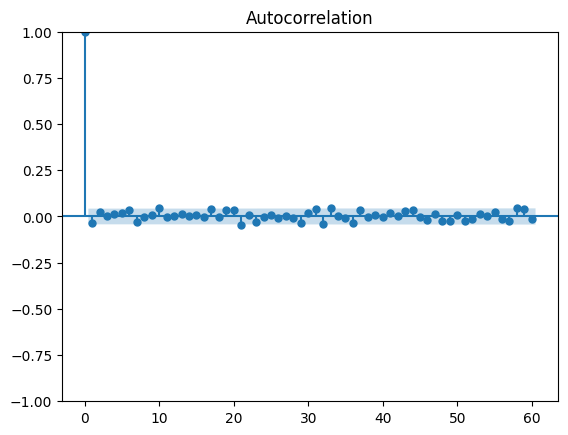

In [ ]:
#Part - 2
plot_acf(ret, lags = 60)
pyplot.show()

In [ ]:
ret_autocorrelation_coefficients = acf(ret, nlags = 60)

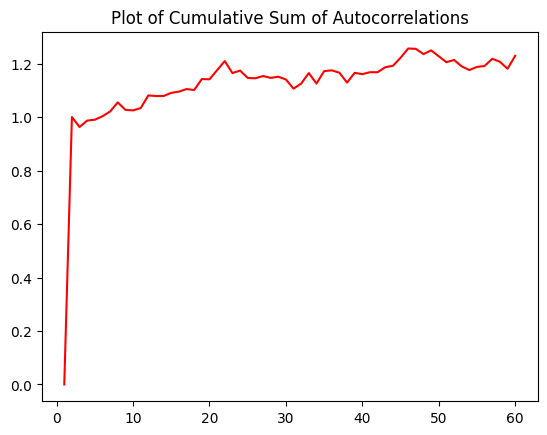

In [ ]:



#print("ret Autocorrelation Coefficients are as follows: ")
#print(ret_autocorrelation_coefficients)

def cumulative_sum_autocorrelations(n, ret_acr_coeff):
    cumsum_acr = 0
    for i in range(0, n):
        cumsum_acr += ret_acr_coeff[i]
    return cumsum_acr

cumulative_sum_acr = cumulative_sum_autocorrelations(5, ret_autocorrelation_coefficients)
#print("\nCumulative Sum of 5 Autocorrelations is: " +str(cumulative_sum_acr))

cumsum_acr_array = []
for i in range (0, 60):
    cumsum_acr_array.append(cumulative_sum_autocorrelations(i, ret_autocorrelation_coefficients))

x = np.linspace(1, 60, num = 60)
y = cumsum_acr_array
plt.title("Plot of Cumulative Sum of Autocorrelations")
plt.plot(x, y, color="red")

In [ ]:
# Check data types of 'Mkt-RF' and 'ret' columns
print(df['Mkt-RF'].dtype)
print(df['ret'].dtype)

object
float64


In [ ]:
# Convert non-numeric values to NaN
df['Mkt-RF'] = pd.to_numeric(df['Mkt-RF'], errors='coerce')

In [ ]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')

In [ ]:
# Check data type after conversion
print(df['Mkt-RF'].dtype)

float64


In [ ]:
# Check data type after conversion
print(df['ret'].dtype)

float64


* Explanation of Plots:
As observed in the plot of cumulative sum of autocorrelations, the curve is increasing initially as we have positive autocorrelations for the first 20 orders. As we get more negative autocorrelations, the cumulative sum begins to reduce. The first plot of autocorrelation coefficients exhibits stationarity and therefore exhibits qualities of predictability as well as the first plot is largely centralised.

In [ ]:
#Part - 3
sm.stats.acorr_ljungbox(ret, lags=[6],return_df=True)

,lb_stat,lb_pvalue
6,7.727234,0.258776


* The p-value is smaller than 0.05. Hence we reject the null hypothesis, and it means that the RMW series exhibits autocorrelation.

In [ ]:
# Check the length of the DataFrame
print(len(df))

2129


In [ ]:
print(df.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168],
           dtype='int64', length=2129)


In [ ]:
# Drop rows with NaN or infinite values in the 'x' variable
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['x'])

# Define predictor and response variables
y = df['ret']
x = df[['const', 'x']]

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     108.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           9.63e-25
Time:                        18:03:30   Log-Likelihood:                 3787.5
No. Observations:                2128   AIC:                            -7571.
Df Residuals:                    2126   BIC:                            -7560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.315      0.1

* We use the Ferson and Siegel procedure to generate time-series efficient factors. We treat RMW as a market signal and assume a case of one risky and one risk-free asset. Using The Ferson-Siegel Analysis, the RMW factor's return is a function of past realized excess market returns (Mkt-RF).

In [ ]:
#Part - 5
#OLS Standard Errors
print('OLS Standard Error is: '+str(model.bse))

#perform White's test
white_test = het_white(model.resid,  model.model.exog)
white_test

OLS Standard Error is: const    0.000886
x        0.000826
dtype: float64


(193.17253916398636,
 1.1300979651130005e-42,
 106.07965155355575,
 1.223299309447061e-44)